In [1]:
from mitmproxy import flow, io, http
from mitmproxy.exceptions import FlowReadException
import matplotlib.pyplot as plt
import hashlib
import pandas as pd
import json, sys

In [2]:
a = []
d = []
b = []

with open("mitm.dump", "rb") as logfile:
        freader = io.FlowReader(logfile)
        try:
                for f in freader.stream():
                        r = f.response
                        a.append(r)

        except FlowReadException as v:
                print("Flow file corrupted. Stopped loading.")


In [3]:
for i in a:
    try:
        if i.status_code == 200:
            h = hashlib.sha1(i.content).hexdigest()
            if h in b:
                for j in d:
                    if j["hash"] == h:
                        j["count"] += 1
                        break
            else:
                m = {}
                m["hash"] = h
                m["content"] = i.content
                b.append(h)

                try:
                    m["type"] = i.headers["content-type"]
                except:
                    pass
                
                try:
                    m["size"] = int(i.headers["content-length"]) / 1024
                    if m["size"] == 0:
                        continue
                except:
                    pass

                m["count"] = 1
                
                d.append(m)
    except:
        pass

In [4]:
df = pd.DataFrame.from_dict(d)
df.dropna()

,hash,content,type,size,count
0,c8a2cba269d6cba48d247ab7465e1ad642d81be3,"b'{""ts"":1729731897,""pts"":10020863,""updates"":[]...",application/json; charset=UTF-8,0.045898,60
1,3099511de7fb37be9d3a7e33d524bf34f8998b43,"b'{""ts"":1729731897,""updates"":[]}\r\n'",application/json; charset=UTF-8,0.031250,58
2,0095b6822f4d0275e7bd45eaab4acdcd768befc0,"b'[{""ts"":""367800507"",""events"":[]},{""ts"":""55618...",text/javascript; charset=UTF-8,0.207031,1
3,de57edf640a9d1bce45865e35988087d8c64316f,"b'[{""ts"":""367800508"",""events"":[]},{""ts"":""55618...",text/javascript; charset=UTF-8,0.145508,1
4,75783588a7ab3fe187a57a181210802974842d75,"b'[{""ts"":""367800509"",""events"":[]},{""ts"":""55618...",text/javascript; charset=UTF-8,0.142578,1
...,...,...,...,...,...
1104,1652d0db5e15910629f6c08f8dc47352618a7ada,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,image/jpeg,70.009766,1
1105,55c00c3ec75213a358b085b6278534d6ed0594cc,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,image/jpeg,114.731445,1
1106,582308dfbbb674000946648488e3652672dac17b,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,image/jpeg,21.393555,1
1107,bb4f8c09b39e19a51a961009ec086483951da212,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,image/jpeg,24.983398,1


In [5]:
df["size"].describe()

count    1105.000000
mean       60.721599
std        51.362778
min         0.027344
25%         7.290039
50%        60.228516
75%        98.096680
max       345.243164
Name: size, dtype: float64

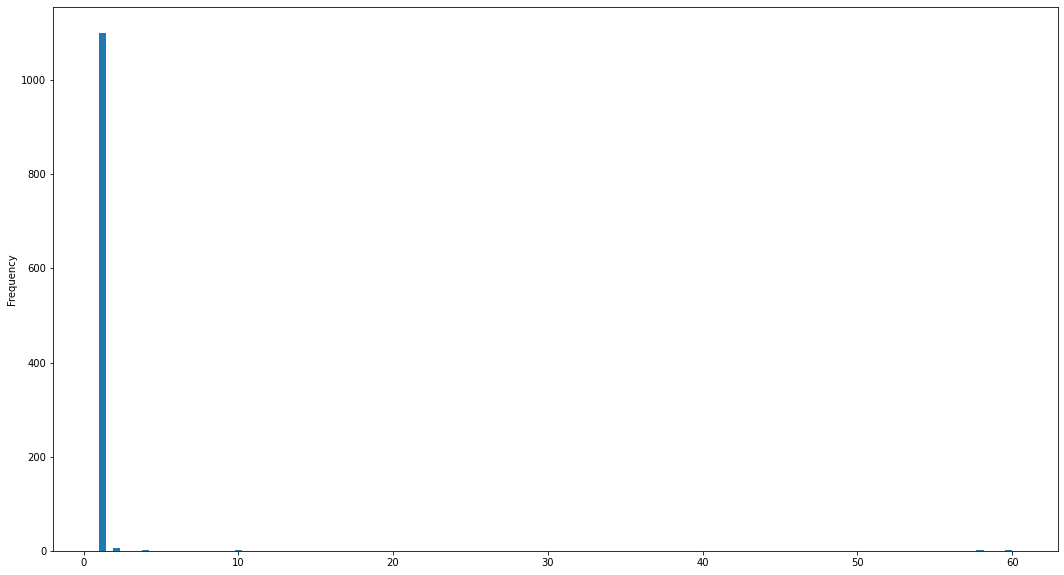

In [6]:
ax = df["count"].plot.hist(bins=128, figsize=(18,10))

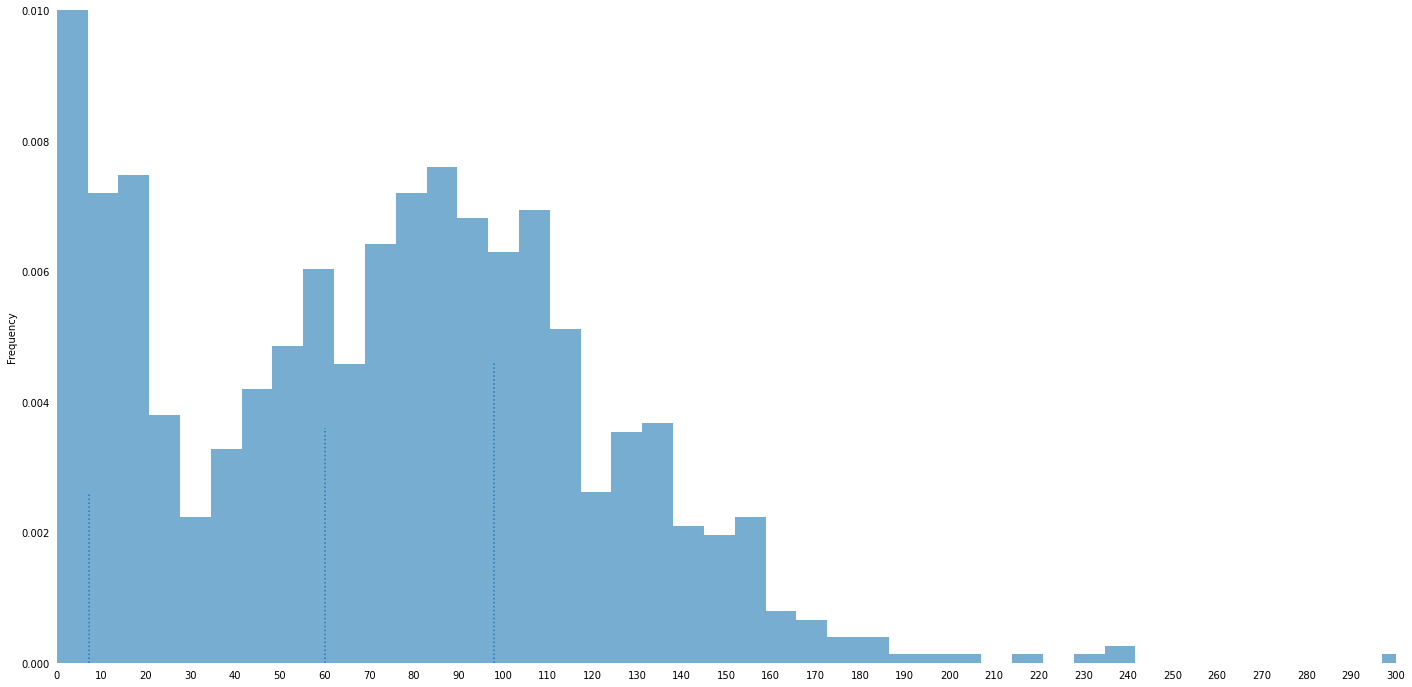

In [7]:
a = df["size"]

fig, ax = plt.subplots(figsize = (24, 12))
a.plot(kind = "hist", density = True, alpha = 0.6, bins = 50)


quant_25, quant_50, quant_75 =  a.quantile(0.25), a.quantile(0.5), a.quantile(0.75)
quants = [[quant_25, 1, 0.26], [quant_50, 1, 0.36],  [quant_75, 1, 0.46]]
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")


x_start, x_end = 0, 300
ax.set_xlim(x_start, x_end)

y_start, y_end = 0, 0.01
ax.set_ylim(y_start, y_end)

plt.locator_params(axis="x", nbins=int(3/4*50))
# plt.locator_params(axis="y", nbins=10)

# Remove ticks and spines
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)
    
plt.show()